Best Classifier: RF
Best Mean Test Score: 0.8897857666508692
Accuracy of Best Classifier on Test Data: 0.69241
F1 Score of Best Classifier on Test Data: 0.40946
Recall of Best Classifier on Test Data: 0.50018
Precision of Best Classifier on Test Data: 0.84619

Hyperparameters of the Best Classifier (RF):
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


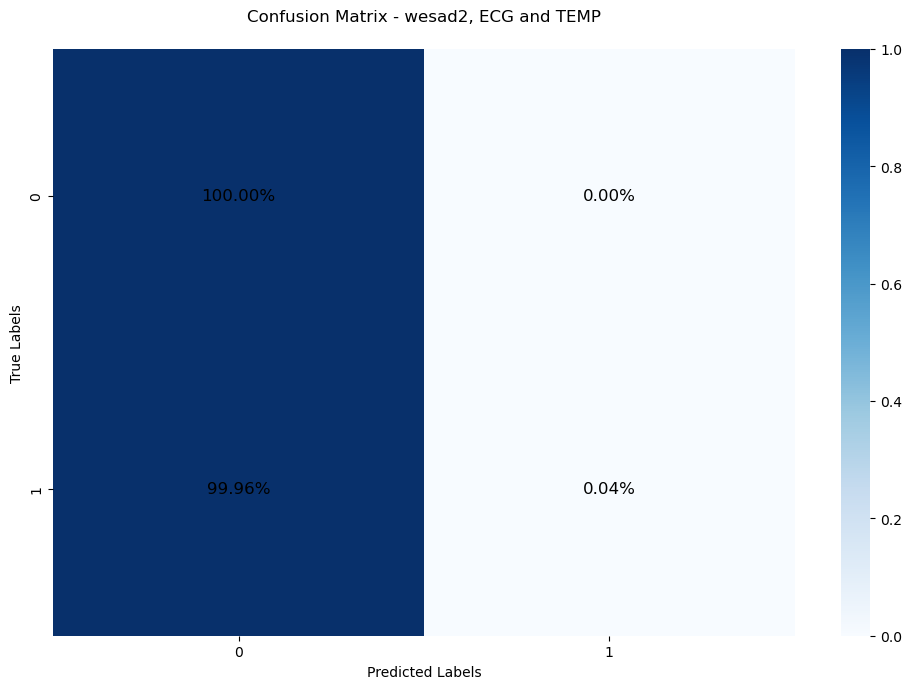

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reload the dataset with the correct delimiter
dataset = pd.read_csv('/Users/samson/Documents/Final3/wesad2/combined_data.csv')

dataset.fillna(0, inplace=True)

label_mapping = {3 : 1}
dataset['condition'] = dataset['condition'].replace(label_mapping)

# orignial trained features
subCol = ['EDA','Temp']

y = dataset['condition'].copy()
X = dataset[subCol]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Load all the dumped files for classifiers
def load_all_objs(directory):
    results = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as f:
                clf_name = filename.split('_')[0]  # Extract classifier name from filename
                results[clf_name] = pickle.load(f)
    return results

# Define directory and load models
directory = '/Users/samson/Documents/Final3/affect/result'
results = load_all_objs(directory)

# Find the best classifier based on the test score
best_score = 0
best_clf_name = None
for clf_name, result in results.items():
    mean_test_score = result['cv_results']['mean_test_score'].mean()
    if mean_test_score > best_score:
        best_score = mean_test_score
        best_clf_name = clf_name

# Load the best estimator model
best_estimator = results[best_clf_name]['best_estimator']

# Make predictions and calculate metrics on the test set
predictions = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')  # Calculate recall
precision = precision_score(y_test, predictions, average='macro')  # Calculate precision

# Print the performance metrics
print(f"Best Classifier: {best_clf_name}")
print(f"Best Mean Test Score: {best_score}")
print(f"Accuracy of Best Classifier on Test Data: {accuracy:.5f}")
print(f"F1 Score of Best Classifier on Test Data: {f1:.5f}")
print(f"Recall of Best Classifier on Test Data: {recall:.5f}")
print(f"Precision of Best Classifier on Test Data: {precision:.5f}")

# Print the hyperparameters of the best classifier
print(f"\nHyperparameters of the Best Classifier ({best_clf_name}):")
print(best_estimator.get_params())

conf_matrix = np.array([[5, 2], [1, 3]])

# Assuming y and predictions are defined and contain the true labels and predictions
conf_matrix = confusion_matrix(y_test, predictions)

# Calculate percentage of each value in the confusion matrix
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix_percentage = np.nan_to_num(conf_matrix_percentage)  # Replace NaN with zero if any

# Plotting the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix_percentage, annot=False, fmt='.2%', cmap='Blues')  # Turn off automatic annotation

# Manually add text annotations with better control.
for i in range(conf_matrix_percentage.shape[0]):
    for j in range(conf_matrix_percentage.shape[1]):
        percentage = conf_matrix_percentage[i, j]
        text = "{:.2%}".format(percentage)
        ax.text(j + 0.5, i + 0.5, text, 
                fontsize=12,  # you can change this size to fit your needs
                ha='center', va='center')

# Labels, title, and ticks
plt.title('Confusion Matrix - wesad2, ECG and TEMP', pad=20)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust the plot
plt.tight_layout()

# Show the plot
plt.show()


RandomForest: 
 [0.18387105 0.05817186 0.15228786 0.13504248 0.15910597 0.15088623
 0.08347607 0.07715848]


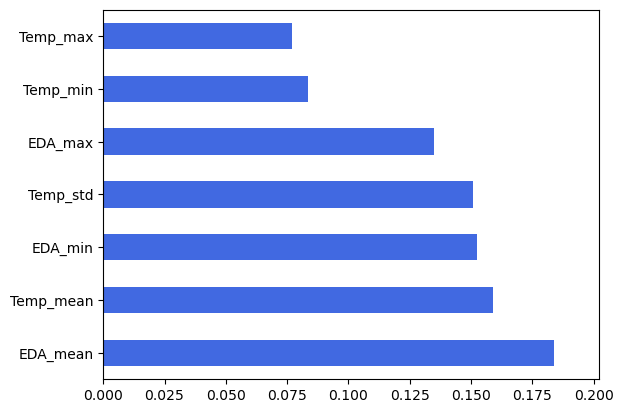

In [8]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


# orignial trained features
subCol = ['EDA_mean','EDA_std','EDA_min','EDA_max','Temp_mean','Temp_std','Temp_min','Temp_max']

y = dataset['condition'].copy()
X = dataset[subCol]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


# Change to use RandomForestClassifier
model = [RandomForestClassifier()]

# Fit the model
model = [model[i].fit(X, y) for i in range(len(model))]

# Assuming num_chr is for controlling output string length
num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n', model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_, index=X.columns)
    feat_importances.nlargest(7).plot(kind='barh', color='royalblue')
    plt.xlim(0, max(feat_importances.nlargest(7)) * 1.1)  # Adjust xlim to fit the largest importance
    plt.show()


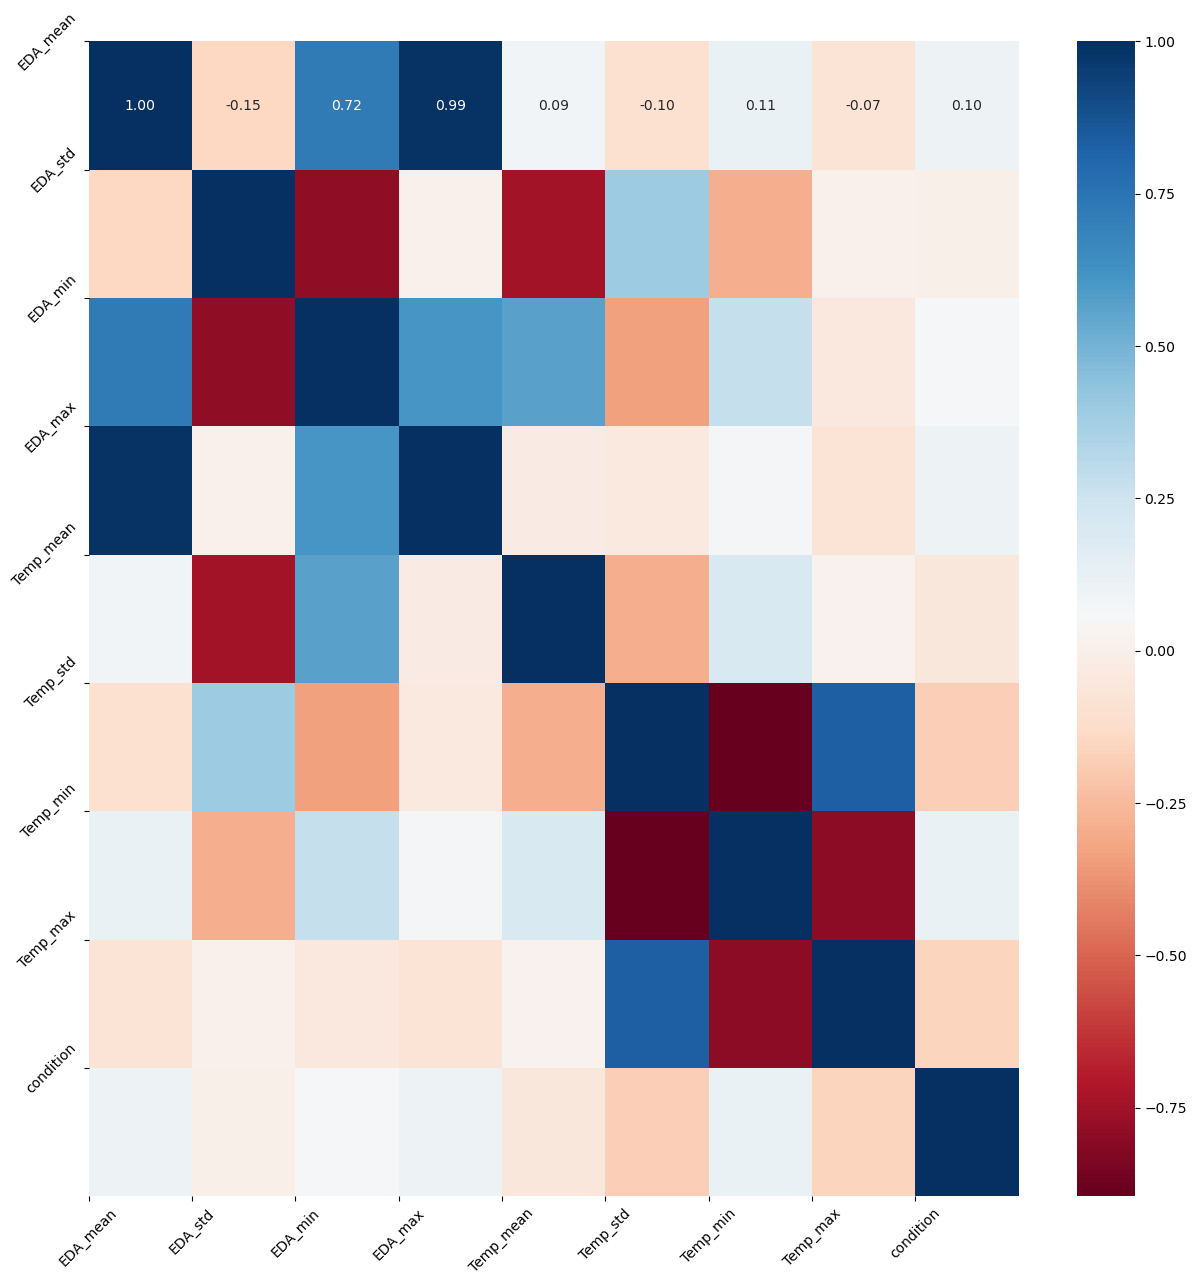

In [9]:
# Calculate and plot the Pearson correlation matrix outside the for-loop
corr = dataset[subCol + ['condition']].corr(method='pearson')  # Including target variable 'condition' for correlation
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)  # Added rotation for better label readability
plt.yticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.show()